In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [215]:
nke_data = pd.read_csv('data/NKE 과거 데이터.csv')
nke_data.head()

# 한글로 되어있어 closed -> 종가

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2019- 04- 05,85.40,86.00,86.16,85.05,7.37M,0.14%
1,2019- 04- 04,85.28,84.49,85.38,84.36,3.66M,0.96%
2,2019- 04- 03,84.47,84.90,84.99,84.25,4.08M,0.12%
3,2019- 04- 02,84.37,85.00,85.26,84.16,4.43M,-1.01%
4,2019- 04- 01,85.23,85.04,85.32,84.70,6.74M,1.21%


In [216]:
nke_data=nke_data.sort_values(by=['날짜'])
nke_data

,날짜,종가,시가,고가,저가,거래량,변동 %
2517,2009- 04- 06,12.82,12.82,12.88,12.62,11.08M,-1.16%
2516,2009- 04- 07,12.46,12.59,12.60,12.38,11.58M,-2.81%
2515,2009- 04- 08,12.56,12.49,12.65,12.36,13.10M,0.80%
2514,2009- 04- 09,13.32,12.81,13.38,12.65,18.04M,6.05%
2513,2009- 04- 13,13.28,13.18,13.37,12.90,13.20M,-0.30%
...,...,...,...,...,...,...,...
4,2019- 04- 01,85.23,85.04,85.32,84.70,6.74M,1.21%
3,2019- 04- 02,84.37,85.00,85.26,84.16,4.43M,-1.01%
2,2019- 04- 03,84.47,84.90,84.99,84.25,4.08M,0.12%
1,2019- 04- 04,85.28,84.49,85.38,84.36,3.66M,0.96%


In [381]:
nke_data['날짜']

2517    2009- 04- 06
2516    2009- 04- 07
2515    2009- 04- 08
2514    2009- 04- 09
2513    2009- 04- 13
            ...     
4       2019- 04- 01
3       2019- 04- 02
2       2019- 04- 03
1       2019- 04- 04
0       2019- 04- 05
Name: 날짜, Length: 2518, dtype: object

## 2. 학습 예측 데이터 셋 나누기

In [217]:

split_count = int(nke_data.shape[0]*0.8)
split_count
# train, test로 슬라이싱을 통해 데이터로 나눈다
# df로 전체를 부른다
train = nke_data[:split_count-1].copy()
test = nke_data[split_count-1:].copy()
train

# split_count 반대로 불러와야 train : 2009-04-06 ~ 2017-04-03

,날짜,종가,시가,고가,저가,거래량,변동 %
2517,2009- 04- 06,12.82,12.82,12.88,12.62,11.08M,-1.16%
2516,2009- 04- 07,12.46,12.59,12.60,12.38,11.58M,-2.81%
2515,2009- 04- 08,12.56,12.49,12.65,12.36,13.10M,0.80%
2514,2009- 04- 09,13.32,12.81,13.38,12.65,18.04M,6.05%
2513,2009- 04- 13,13.28,13.18,13.37,12.90,13.20M,-0.30%
...,...,...,...,...,...,...,...
509,2017- 03- 28,56.62,55.99,56.78,55.79,7.82M,1.23%
508,2017- 03- 29,56.68,56.41,57.10,56.35,7.46M,0.11%
507,2017- 03- 30,56.04,56.48,56.60,55.81,7.21M,-1.13%
506,2017- 03- 31,55.73,56.00,56.03,55.65,5.91M,-0.55%


In [395]:
test['날짜']

504    2017- 04- 04
503    2017- 04- 05
502    2017- 04- 06
501    2017- 04- 07
500    2017- 04- 10
           ...     
4      2019- 04- 01
3      2019- 04- 02
2      2019- 04- 03
1      2019- 04- 04
0      2019- 04- 05
Name: 날짜, Length: 505, dtype: object

## 2.1 결측치는 없을꺼고

In [218]:
nke_data.isnull().sum()

날짜      0
종가      0
시가      0
고가      0
저가      0
거래량     0
변동 %    0
dtype: int64

In [219]:
nke_data.describe

<bound method NDFrame.describe of                 날짜     종가     시가     고가     저가     거래량    변동 %
2517  2009- 04- 06  12.82  12.82  12.88  12.62  11.08M  -1.16%
2516  2009- 04- 07  12.46  12.59  12.60  12.38  11.58M  -2.81%
2515  2009- 04- 08  12.56  12.49  12.65  12.36  13.10M   0.80%
2514  2009- 04- 09  13.32  12.81  13.38  12.65  18.04M   6.05%
2513  2009- 04- 13  13.28  13.18  13.37  12.90  13.20M  -0.30%
...            ...    ...    ...    ...    ...     ...     ...
4     2019- 04- 01  85.23  85.04  85.32  84.70   6.74M   1.21%
3     2019- 04- 02  84.37  85.00  85.26  84.16   4.43M  -1.01%
2     2019- 04- 03  84.47  84.90  84.99  84.25   4.08M   0.12%
1     2019- 04- 04  85.28  84.49  85.38  84.36   3.66M   0.96%
0     2019- 04- 05  85.40  86.00  86.16  85.05   7.37M   0.14%

[2518 rows x 7 columns]>

## 3. 학습 예측에 사용할 column

In [220]:
nke_data.columns

Index(['날짜', '종가', '시가', '고가', '저가', '거래량', '변동 %'], dtype='object')

In [333]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명 가져옴
feature_names=train.columns.tolist() 
feature_names.remove('종가')
feature_names.remove('날짜')
feature_names.remove('변동 %')
feature_names.remove('거래량')


feature_names
# 맨 마지막것만 빼고 가져오겠다

['시가', '고가', '저가']

In [334]:
## 4. 정답값이자 예측값

In [335]:
# nke_close 이라는 변수에 예측할 컬럼의 이름을 담는다

nke_close = '종가'
nke_close

'종가'

In [350]:
# 학습 세트 만들기
# 예) 시험의 기출문제
X_train = train[feature_names]

print(X_train.shape)


X_train.tail()
X_train.shape

(2013, 3)


(2013, 3)

In [351]:


# 정답 값을 만들어준다
# 예) 기출문제의 정답
y_train = train[nke_close]
print(y_train.shape)
y_train.tail()

(2013,)


509    56.62
508    56.68
507    56.04
506    55.73
505    55.56
Name: 종가, dtype: float64

In [352]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(505, 3)


,시가,고가,저가
504,55.15,55.30,54.83
503,54.97,55.80,54.50
502,55.07,55.94,54.94
501,55.10,55.24,54.77
500,55.00,55.33,54.72


In [353]:
y_test=test[nke_close]

print(y_test.shape)
y_test.tail()

(505,)


4    85.23
3    84.37
2    84.47
1    85.28
0    85.40
Name: 종가, dtype: float64

In [434]:
y_test.describe

<bound method NDFrame.describe of 504    55.04
503    54.98
502    55.14
501    55.11
500    54.90
       ...  
4      85.23
3      84.37
2      84.47
1      85.28
0      85.40
Name: 종가, Length: 505, dtype: float64>

In [354]:
from pandas.plotting import scatter_matrix
import seaborn as sns

# Function and modules for data analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Function and modules for the supervised regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

import statsmodels.api as sm

In [355]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_1777/1375720025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
/var/folders/sp/mym89g410d75pchy52vhq7y80000gn/T/ipykernel_1777/1375720025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


## 6. 랜덤포레스트 알고리즘 가져와볼게

In [356]:
model = RandomForestRegressor(n_estimators=10, random_state=10)
model


RandomForestRegressor(n_estimators=10, random_state=10)

In [357]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [358]:
predictions = model.predict(X_test)

In [359]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [360]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 69.18775567722768


In [426]:
y_predict = model.predict(X_test)


In [436]:
y_predict

array([54.981, 55.536, 55.689, 54.911, 55.056, 54.636, 55.218, 55.128,
       55.889, 55.999, 55.852, 56.437, 55.988, 55.841, 55.925, 55.474,
       55.124, 55.239, 55.054, 54.697, 54.793, 54.319, 53.918, 53.983,
       54.374, 54.636, 53.782, 53.928, 54.006, 52.736, 52.567, 51.632,
       51.826, 51.603, 52.155, 51.874, 52.32 , 52.447, 52.913, 53.11 ,
       52.611, 52.772, 53.143, 52.899, 53.259, 53.858, 53.244, 53.913,
       54.267, 54.219, 53.151, 51.175, 51.767, 51.488, 52.389, 52.232,
       52.852, 52.741, 52.792, 53.432, 53.434, 58.23 , 58.684, 57.675,
       57.497, 57.834, 58.344, 58.308, 58.416, 58.334, 57.754, 57.873,
       57.716, 57.729, 59.416, 59.476, 59.302, 59.496, 58.844, 58.214,
       58.584, 58.748, 59.514, 59.575, 60.229, 60.175, 59.976, 59.528,
       59.565, 59.576, 58.737, 59.617, 58.394, 58.412, 57.885, 54.887,
       53.686, 54.012, 53.406, 53.401, 53.87 , 53.975, 52.368, 52.608,
       52.9  , 53.235, 53.244, 53.068, 52.392, 52.048, 52.736, 53.74 ,
      

In [427]:
test['날짜']

504    2017- 04- 04
503    2017- 04- 05
502    2017- 04- 06
501    2017- 04- 07
500    2017- 04- 10
           ...     
4      2019- 04- 01
3      2019- 04- 02
2      2019- 04- 03
1      2019- 04- 04
0      2019- 04- 05
Name: 날짜, Length: 505, dtype: object

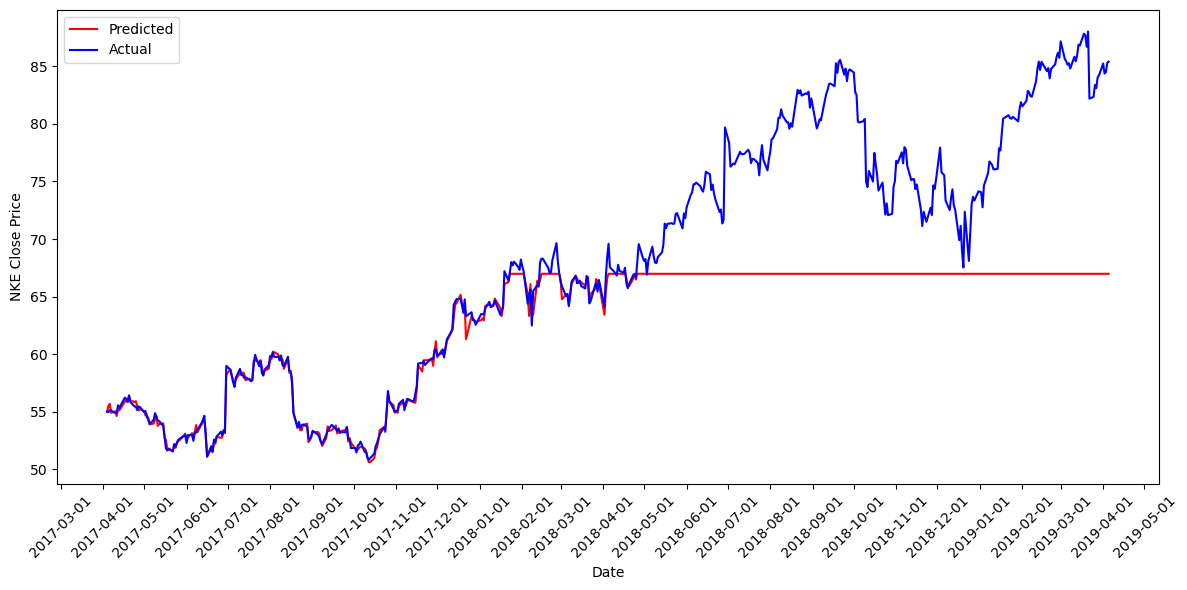

In [439]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
nke_data['날짜'] = pd.to_datetime(nke_data['날짜'])

#dates = test['날짜']

# 원하는 날짜 범위 설정
start_date = '2017-04-04'
end_date = '2019-04-05'

# 해당하는 날짜 범위의 데이터 추출
dates_range = nke_data[(nke_data['날짜'] >= start_date) & (nke_data['날짜'] <= end_date)]['날짜']
y_predict_range = y_predict[(dates >= start_date) & (dates <= end_date)]
y_test_range = y_test[(dates >= start_date) & (dates <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(dates_range, y_predict, label='Predicted', color='red')
plt.plot(dates_range, y_test.values, label='Actual', color='blue')
plt.xlabel('Date')
plt.ylabel('NKE Close Price')

# X 축 눈금 설정
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # 매 월 눈금 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 날짜 형식 지정
plt.xticks(rotation=45)  # x축 레이블 회전

plt.legend()
plt.tight_layout()
plt.show()


In [429]:
dates_range.info

<bound method Series.info of 504   2017-04-04
503   2017-04-05
502   2017-04-06
501   2017-04-07
500   2017-04-10
         ...    
4     2019-04-01
3     2019-04-02
2     2019-04-03
1     2019-04-04
0     2019-04-05
Name: 날짜, Length: 505, dtype: datetime64[ns]>